# Hybrid circuit (500MHz cable BPF)

In [365]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# Parameters
top_level=f'{os.getcwd()}/..'
path    = f'{top_level}/data/hybrid_500MHz.npy'

waveform=np.load(path)

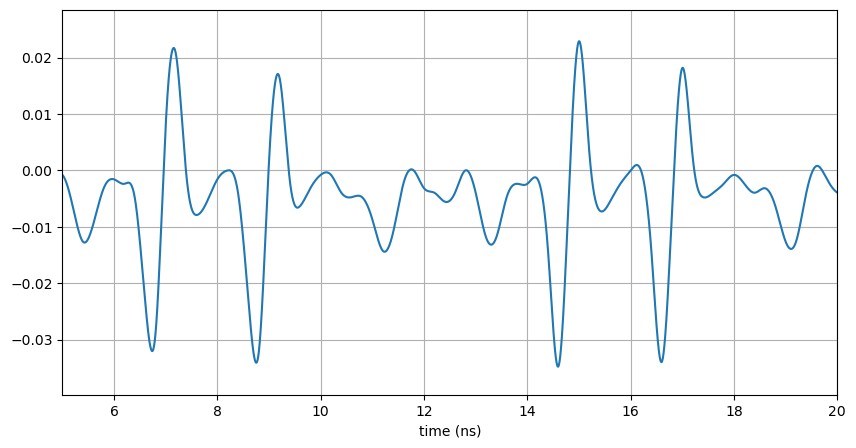

In [383]:
t=np.arange(0,len(waveform[0]))*1e-3
plt.figure(figsize=(10,5))
plt.plot(t,waveform[0])
plt.xlim(5,20)
plt.xlabel("time (ns)")
plt.grid()
plt.show()

In [321]:
timestep=np.arange(0,len(waveform[0]))*1e-3
newTimeBin = 1.0/(0.509*8.0) # Unit of ns for 3.054 GSPS
newSize    = 32000
newTimeSteps = np.linspace(0, newTimeBin*(newSize-1), num=newSize)
newwaveform = np.interp(newTimeSteps, timestep, waveform[0])
concat.append(newwaveform)

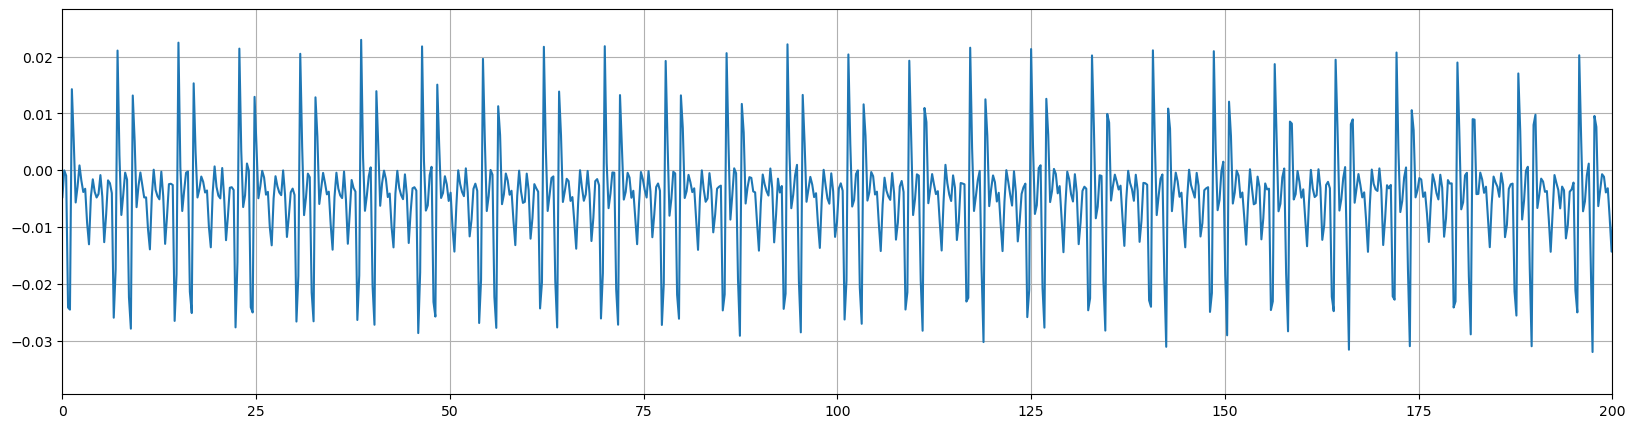

In [343]:
t=np.arange(0,len(newwaveform))*1000/4072
plt.figure(figsize=(20,5))
plt.plot(t,newwaveform)
plt.xlim(0,200)
plt.grid()
plt.show()

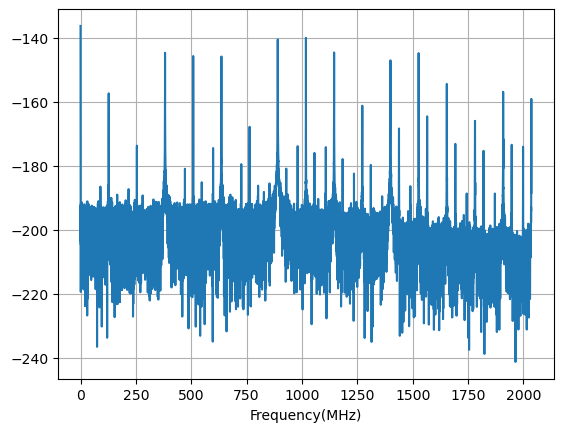

In [325]:
#FFT
size    = len(newwaveform) # Number of data points in the file
timeBin = 1000/4072 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(newwaveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:20000],mag[0:20000])
plt.xlabel("Frequency(MHz)")
plt.grid()

In [363]:
h=[0.000000000000000000, -0.000003761626366296,-0.000023108600556681,-0.000070181299351294,-0.000156383040298898,-0.000290946582610021,-0.000478908766382416,-0.000718522630895229,-0.000998287994100151,-0.001293935561982801,-0.001565828137811183,-0.001757318494212121,-0.001794605571167997,-0.001588546884271016,-0.001038715453155498, -0.000039747361828932,0.001510263369209664,0.003699867705185092,0.006593681474405179,0.010222147688523151,0.014572771082472864,0.019583933396682594,0.025142242325415006,0.031084085097223258, 0.037201674014594788, 0.043253424988365173,0.048978050186079633, 0.054111325560085473,0.058404163990957311,0.061640426928329231,0.063652869172581450,0.064335742049761585,0.063652869172581464,0.061640426928329231, 0.058404163990957311, 0.054111325560085473,0.048978050186079647, 0.043253424988365173, 0.037201674014594802,0.031084085097223272,0.025142242325415013,0.019583933396682598,0.014572771082472864, 0.010222147688523158, 0.006593681474405186,0.003699867705185093,0.001510263369209666,-0.000039747361828932,-0.001038715453155498,-0.001588546884271017,-0.001794605571167997,-0.001757318494212124, -0.001565828137811183, -0.001293935561982803,-0.000998287994100151,-0.000718522630895228,-0.000478908766382416,-0.000290946582610021,-0.000156383040298898, -0.000070181299351294,-0.000023108600556682,-0.000003761626366296,0.000000000000000000]
len(h)

63

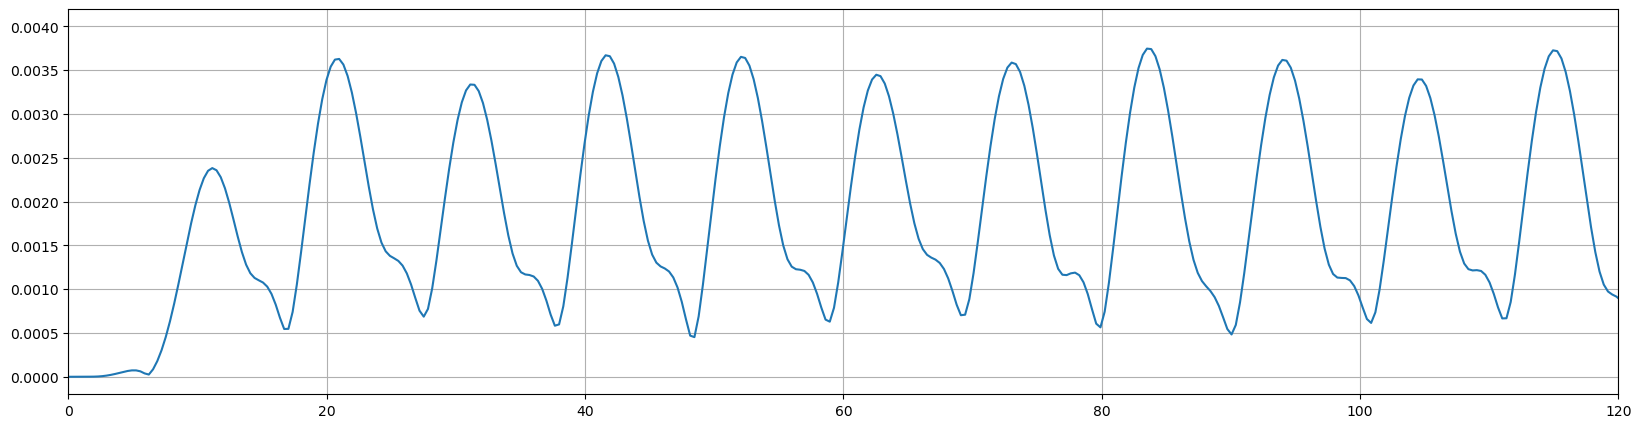

In [364]:
#NCO and FIR filter
mixer_frequency_down = 500e6  
t=np.arange(0,len(newwaveform))*1000/4072
i_signal_down = newwaveform * np.cos(2 * np.pi * mixer_frequency_down * t * 1e-9)
q_signal_down = newwaveform * np.sin(2 * np.pi * mixer_frequency_down * t * 1e-9)

i_conv_down = np.convolve(i_signal_down, h)
q_conv_down = np.convolve(q_signal_down, h)

mag_down=(i_conv_down**2+q_conv_down**2)**0.5

t2=np.arange(0,len(mag_down))*1000/3054
plt.figure(figsize=(20,5))
plt.plot(t2,mag_down)
plt.xlim(0,120)
plt.grid()
plt.show()

In [333]:
# Write the RFDC data interpolated at 3.054 GSPS to file
"""
path = f'{top_level}/data/SimCurve_hybrid_4072MSPS.csv'
with open(path, 'w') as f:
    for smpl in newwaveform:
        f.write(f'{smpl}\n')
"""